### Exercise 1

1.1 

You are renovating your house and you need a sofa. You go to the PoltroneSofa shop
 and find a sofa whose declared length is 180 cm. You take a tape and measure the sofa’s
 length 18 times. The average of the measurements you obtain is 182 cm. You need to test
 if the true height is 180 cm. Which test should you use?

Answer: t-test

1.2

You also need two pillows of different size. Each pillow is measured 40 times. Which
 test should you use to test if the two variances are the same?

Answer: F-test

1.3

A group of researchers is investigating the effectiveness of three different teaching
 methods on improving students’ performance. They conducted an experiment with 90
 students randomly divided into three groups, with 30 students in each group. After the
 experiment, they recorded whether each student passed or failed the final exam, resulting
 in a contingency table. The researchers want to test the null hypothesis that the teaching
 method and students’ exam performance are independent. Which test should they use?

Answer: chi-squared test

### Exercise 2

Given the results of a chemical analysis of wines grown in the same region in Italy (derived from three different cultivars), a researcher wants to analyze the relationship between the 13 constituents found. Dataset: sklearn.datasets.load_wine (https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.load_wine.html)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

1- compute the average, variance, std deviation, covariance (and plot heatmap) and Quartiles

In [2]:
wines = pd.read_csv('Tutoring1-20250124\\wine.csv')
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
pd.concat([wines.agg(['mean', 'var', 'std']), wines.quantile([0.25, 0.5, 0.75])])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
var,0.659062,1.248015,0.075265,11.152686,203.989335,0.391690,0.997719,0.015489,0.327595,5.374449,0.052245,0.504086,99166.717355
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
0.25,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
0.5,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
0.75,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000


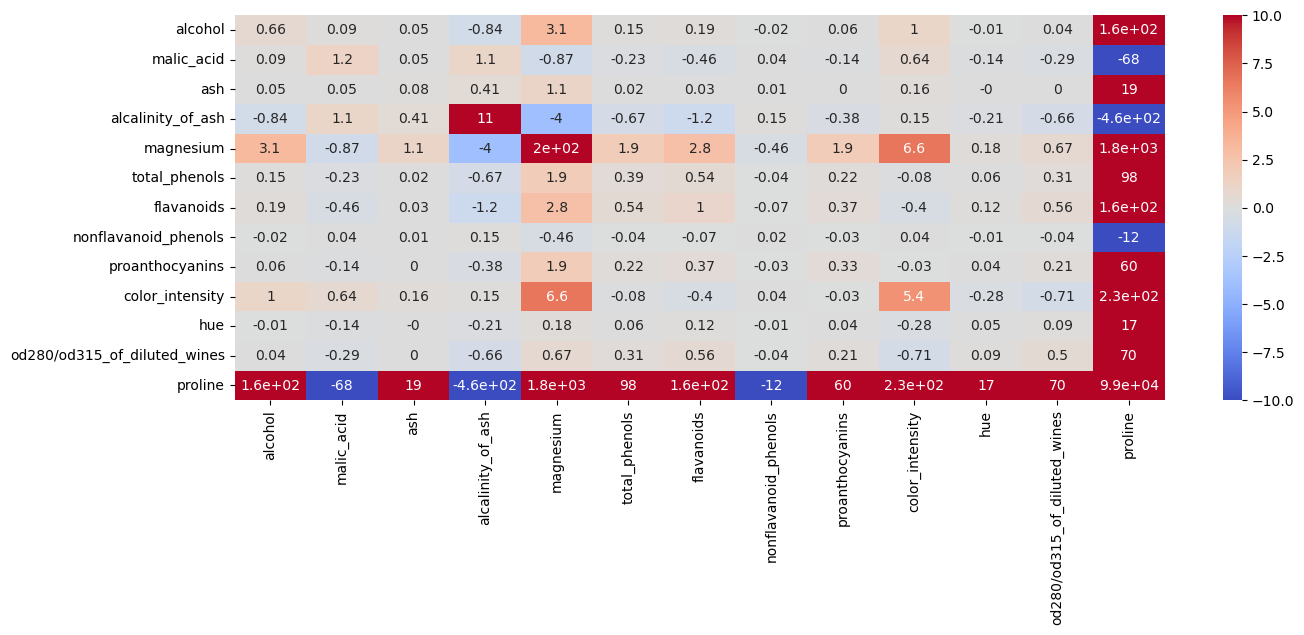

In [6]:
plt.figure(figsize=(15, 5)) # (larghezza, altezza)
sns.heatmap(round(wines.cov(), 2), annot=True, cmap='coolwarm',vmin=-10,vmax=10)
plt.show()

2- are 'total_phenols' and 'color_intensity' correlated? Is significant (95%)?

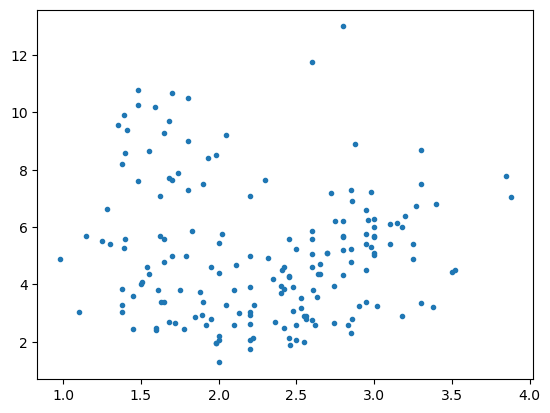

In [8]:
plt.plot(wines['total_phenols'], wines['color_intensity'], '.')
plt.show()

In [4]:
stats.pearsonr(wines['total_phenols'], wines['color_intensity'])

PearsonRResult(statistic=-0.055136417742365995, pvalue=0.46478814552968223)

In [5]:
stats.spearmanr(wines['total_phenols'], wines['color_intensity'])

SignificanceResult(statistic=0.011161793956834237, pvalue=0.8824435092354216)

The Spearman's correlation gives 0.01. Our null hypothesis is that there is no correlation. The result of the p-value tells us that if that the data are non correlated, there is a probability of 88% of obtaining a similar or less compatible (with respect to the null hypothesis) result (i.e. greater correlation). Moreover p > 0.05. Therefore there is no sufficient evidence to reject the null hypothesis.

3- compute pearson correlation coefficient (and plot heatmap) between all 13 variables

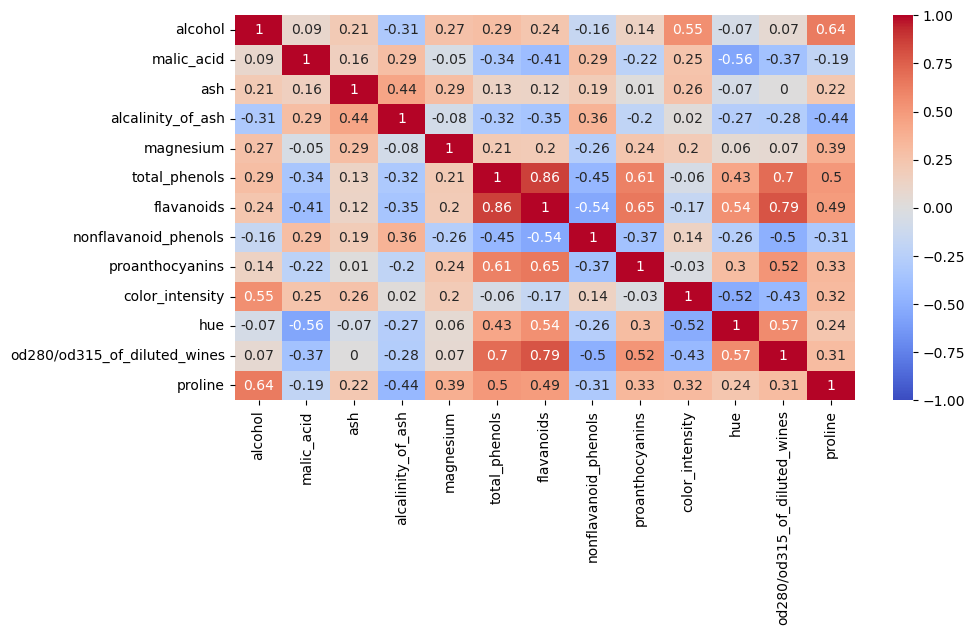

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(wines.corr().round(2),annot=True,cmap='coolwarm',vmin=-1,vmax=1) #By default .corr() calculates the Pearson's one
plt.show()

4- use the linear regression model to describe the data above: y='alcohol', x= 'color intensity' and then plot (scatterplot)

In [6]:
x_color = sm.add_constant(wines['color_intensity'])
lm = sm.OLS(wines['alcohol'], x_color).fit()

In [7]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     74.90
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           3.06e-15
Time:                        11:09:41   Log-Likelihood:                -183.41
No. Observations:                 178   AIC:                             370.8
Df Residuals:                     176   BIC:                             377.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0329      0.123     

The regressor is significant at $95$% because the P>|t| < 0.05. Therefore we reject the null hypothesis zero coefficients.

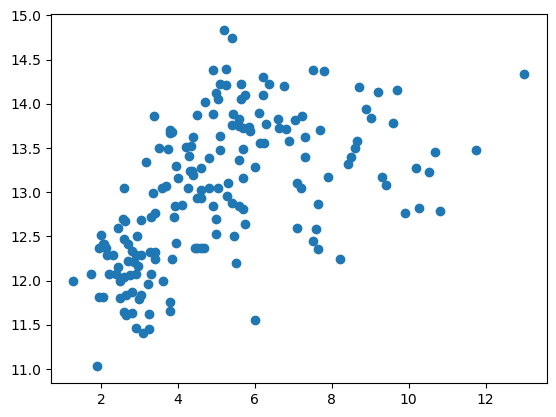

In [17]:
plt.scatter(wines['color_intensity'], wines['alcohol'])
plt.show()

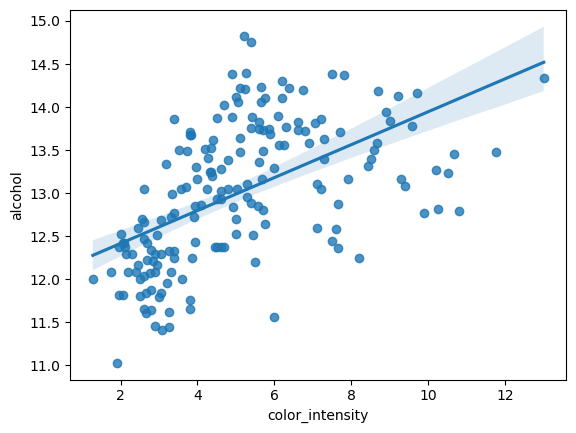

In [19]:
sns.regplot(x="color_intensity", y="alcohol", data=wines)
plt.show()

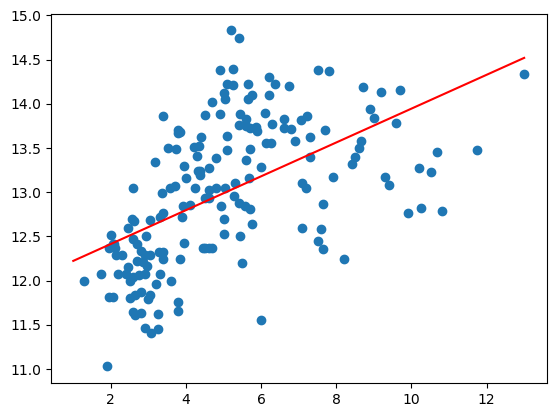

In [7]:
plt.scatter(wines['color_intensity'], wines['alcohol'])
plt.plot(np.linspace(1,13,100), lm.params.iloc[0] + lm.params.iloc[1]*np.linspace(1,13,100), c = 'red')
plt.show()

or more simply

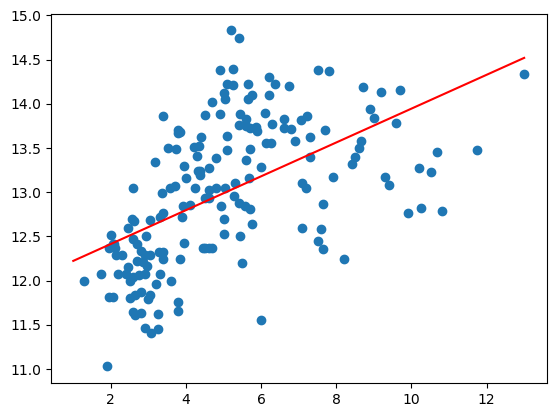

In [8]:
plt.scatter(wines['color_intensity'], wines['alcohol'])
plt.plot(np.linspace(1,13,100), lm.predict(sm.add_constant(np.linspace(1,13,100))), c = 'red')
plt.show()

The following 2 graphs are simply an experiment (not related to the exercise)

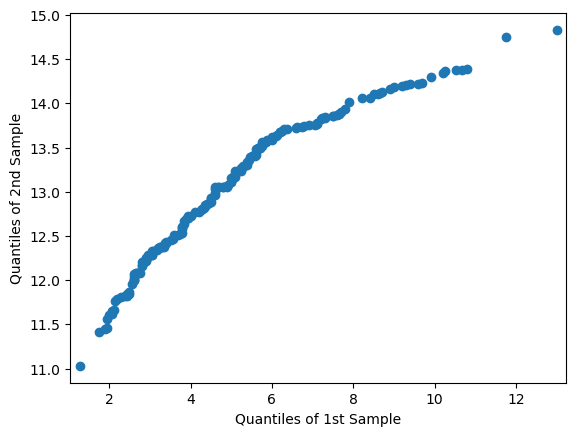

In [9]:
sm.qqplot_2samples(wines['color_intensity'], wines['alcohol'])
plt.show()

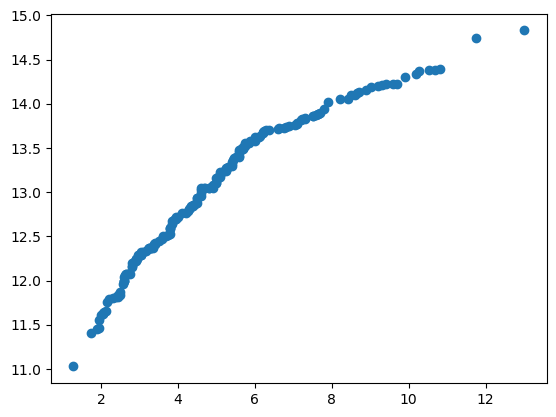

In [12]:
plt.plot(sorted(wines['color_intensity']), sorted(wines['alcohol']), 'o')

5- use the linear regression model (WITH intercept) to describe the data above:


    1- y=’alcohol’, x= [’color_intensity’,’proline’].


    2- y=’alcohol’, x= [’color_intensity’,’proline’,’magnesium’] 
    
 
Formally, which predictors have a significant influence on the response, at the 95% confidence level? Motivate your answer. Which
 model performs better? Discuss in detail the quantities that need to be considered (and those
 that do not)

In [20]:
x1 = sm.add_constant(wines[['color_intensity','proline']])
lm1 = sm.OLS(wines['alcohol'],x1).fit()

In [21]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     104.8
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.19e-30
Time:                        15:10:02   Log-Likelihood:                -144.88
No. Observations:                 178   AIC:                             295.8
Df Residuals:                     175   BIC:                             305.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3183      0.123     91.659      0.000      11.075      11.562
color_intensity     0.1334      0.019      7.088      0.000       0.096       0.171
proline             0.0013      0.000      9.737      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.907
Skew:                           0.167   Prob(JB):                        0.635
Kurtosis:                       2.897   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
x2 = sm.add_constant(wines[['color_intensity','proline','magnesium']])
lm2 = sm.OLS(wines['alcohol'],x2).fit()

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     69.51
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.35e-29
Time:                        15:12:06   Log-Likelihood:                -144.85
No. Observations:                 178   AIC:                             297.7
Df Residuals:                     174   BIC:                             310.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3826      0.296     38.469      0.000      10.799      11.967
color_intensity     0.1338      0.019      7.063      0.000       0.096       0.171
proline             0.0014      0.000      9.162      0.000       0.001       0.002
magnesium          -0.0008      0.003     -0.239      0.811      -0.007       0.006
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.927
Skew:                           0.167   Prob(JB):                        0.629
Kurtosis:                       2.883   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Between the two model the best one is that with only 2 regressors. This can be seen from the fact that such model have lower values of both AIC and BIC anc an higher value on the adjusted $R^2$. Both `color_intensity` and `proline` are statistically significant since the p-value associated with the t-statistic is in both cases lower than 0.05. In the second model the `magnesium` regressor has a minor impact on the regression and we cannot reject, in this case, the null hypothesis of zero coefficient (P>|t| = 0.811 > 0.05).

### Exercise 3

 The dataset 'diagnoses.csv' contains features computed from digitized images of fine needle aspirate
 (FNA) of a breast mass. The features describe various characteristics $X$ of cell nuclei present in the
 images. Each instance in the dataset represents a sample from a patient, and the task is to predict
 whether the sample is benign $(y = 0)$ or malignant $(y = 1)$.

1) Compute the Pearson correlation coefficient between 'smoothness1' and 'compactness1'; 'smooth
ness1' and 'texture1'. Then discuss if they are significant at the 95% confidence level. (2 points)

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
diagnoses = pd.read_csv('Tutoring1-20250124\\diagnoses.csv')
diagnoses

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


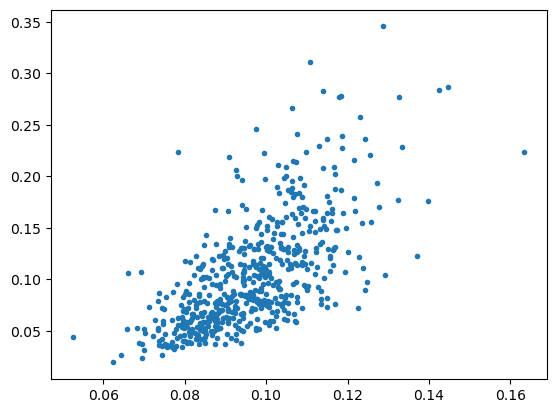

In [11]:
plt.plot(diagnoses['smoothness1'], diagnoses['compactness1'], '.')

In [8]:
stats.pearsonr(diagnoses['smoothness1'], diagnoses['compactness1'])

PearsonRResult(statistic=0.6591232152159223, pvalue=3.403822261701938e-72)

The Pearson correlation result shows a correlation $\rho_p \sim 0.66$. Our null hypothesis is that data are non correlated. But if that was the case, then there would be a probability of $\sim 3.4 \times 10^{-70}$ % of obtaining the result we got or a more incompatible (with the null hypothesis) one. Therefore since the confidence level required is $95$% we can reject the null hypothesis.

In [27]:
stats.pearsonr(diagnoses['smoothness1'], diagnoses['texture1'])

PearsonRResult(statistic=-0.023388515998423547, pvalue=0.5776965879839979)

Since the p = 0.58 > 0.05 we cannot reject the null hypothesis of lack of correlation. The obtained result for the Pearson correlation in non statistically significant.

2.  Write downthe logistic regression model: X=[’texture1’, ’area1’, ’compactness1’, ’concave_points1’]],
 y=’diagnosis’. Fit WITHOUT the constant. 

In [6]:
logit_lm = sm.Logit(diagnoses['diagnosis'],diagnoses[['texture1','area1','compactness1','concave_points1']]).fit()

Optimization terminated successfully.
         Current function value: 0.301824
         Iterations 8


In [8]:
print(logit_lm.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                  0.5429
Time:                        11:21:28   Log-Likelihood:                -171.74
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 4.169e-88
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
texture1           -0.1084      0.028     -3.933      0.000      -0.162      -0.054
area1              -0.0015      0.001     -1.714      0.087      -0.003       0.000
compactness1      -42.9420      

3.  Look at the output of the logistic regression model. Formally, which predictors have a significant
 influence on the response, at the 95% confidence level? Motivate your answer. 

All predictors have a significant influence on the response except fot `area1`. In this case P>|z| = 0.087 > 0.05 so we cannot reject the null hypothesis of zero coefficient.

4.  Estimate the probability for y = 1 with X_test1=[18,500,0.2,0.05] and X_test2=[10,40,0.14,0.06].
 What would be your prediction for y in these cases? 

In [31]:
logit_lm.params.values

array([-1.08443265e-01, -1.45890856e-03, -4.29419717e+01,  1.49494214e+02])

In [10]:
X_test1 = np.array([18, 500, 0.2, 0.05])
X_test2 = np.array([10, 40, 0.14, 0.06])

In [33]:
np.exp(np.dot(logit_lm.params.values, X_test1))/(1 + np.exp(np.dot(logit_lm.params.values, X_test1)))

0.021986030712107394

In [34]:
np.exp(np.dot(logit_lm.params.values, X_test2))/(1 + np.exp(np.dot(logit_lm.params.values, X_test2)))

0.8599636190149014

The two test patients have respectively a probability of $2.2$% and $86$% of having a malignant result ($y = 1$) 

Or more simply

In [ ]:
logit_lm.predict(X_test1) # questo vale come y = 0 (perché il risultato è sotto 0.5)

array([0.02198603])

In [ ]:
logit_lm.predict(X_test2) # questo vale come y = 1 (perché il risultato è sopra 0.5)

array([0.85996362])

### Exercise 4

Given the dataset 'grades.csv'

1. Test if write is normally (i.e. Gaussian) distributed by performing a Kolmogorov-Smirnov test,
with a confidence level of 95%. Discuss the results.

In [4]:
grades = pd.read_csv('Tutoring1-20250124\\grades.csv')
grades

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61
2,44,33,54,58,31
3,63,44,47,53,56
4,47,52,57,53,61
...,...,...,...,...,...
195,55,59,52,42,56
196,42,46,38,36,46
197,57,41,57,55,52
198,55,62,58,58,61


In [15]:
stats.kstest(grades['write'], 'norm', args=(np.mean(grades['write']), np.std(grades['write'])))

KstestResult(statistic=0.13485672359472245, pvalue=0.0012392145128983477, statistic_location=59, statistic_sign=-1)

Since pvalue < 0.05 we reject the null hypothesis of data distributed as gaussian

2) plot a QQ plot; $\bold{write}$ against Gaussian quantiles to check whether the sample is normal (i.e.Gaussian) (2 points)

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from random import choices

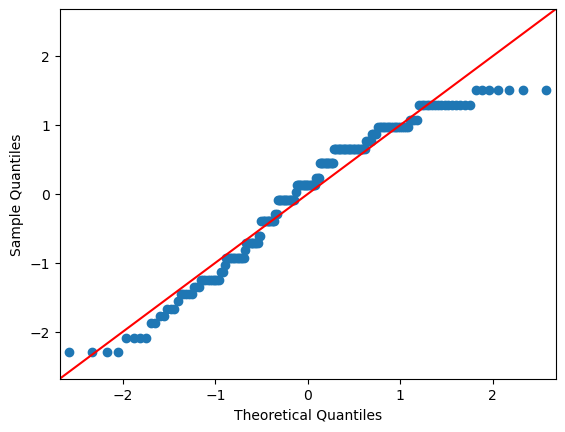

In [37]:
z_write = (grades['write'] - np.mean(grades['write']))/np.std(grades['write'], ddof=1)

sm.qqplot(z_write, line = '45')
plt.show()

or equivalently

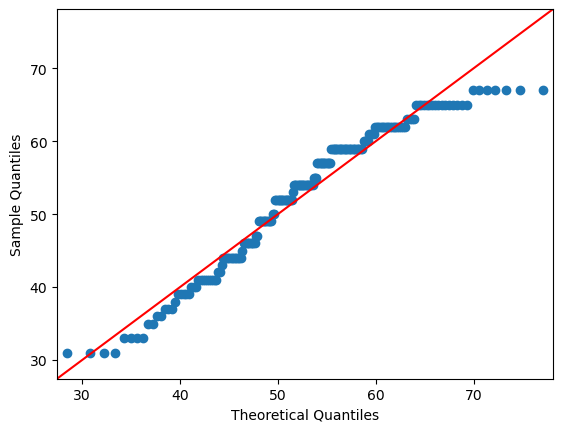

In [7]:
sm.qqplot(grades['write'], stats.norm(np.mean(grades['write']), np.std(grades['write'])), line = '45')
plt.show()

3. Compute the confidence interval, with a confidence level of 95%, of the mean of the variable
 read and median of the variable
 science with a number of bootstrap samples equal to 500.

In [39]:
n_boot = 500 
read_mean_l = []
science_median_l = []

for i in range(n_boot):
    read_sample = choices(grades['read'], k = len(grades))
    science_sample =  choices(grades['science'], k = len(grades))
    read_mean_l.append(np.mean(read_sample))
    science_median_l.append(np.median(science_sample))

In [40]:
np.quantile(read_mean_l, [0.025, 0.975])

array([50.858  , 53.66575])

In [41]:
np.quantile(science_median_l, [0.025, 0.975])

array([50. , 54.5])

### Exercise 5

 Suppose we observe n realizations $y_1,y_2,...,y_n$ of $n$ independent random variables, $Y_1,Y_2,...,Y_n$ all
 having a normal (i.e. Gaussian) distribution with mean $\mu_Y$ and variance $\sigma_{Y}^2$. Consider the following
 alternative estimator for $\sigma_{Y}^2$, the variance of the $Y_i$, where $c > 0$: 

 
 $Z = \frac{1}{(n-c)^2}\sum_{i=1}^{n}(Y_i - \mu_{Y})^2$.

 
 We want to illustrate that this estimator is a biased estimator for $\sigma_{Y}^2$. Fix $c = 4$ and implement the
 estimator above.

1) Randomly draw 20 observations from the normal (i.e. Gaussian) distribution with mean 5 and variance 16 and compute an estimate using $Z$. Repeat this procedure 5000 times. (2 points)

In [35]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [36]:
mu = 5
sigma = np.sqrt(16)
n = 20

Z_arr = np.zeros(5000)

for j in range(5000):
    Y_i = norm.rvs(loc = mu, scale = sigma, size = n)
    Z = (1/(n - 4)**2) * np.sum((Y_i - np.mean(Y_i))**2)
    Z_arr[j] = Z

2) Plot a histogram and cumulative distribution of $Z$. (2 points)

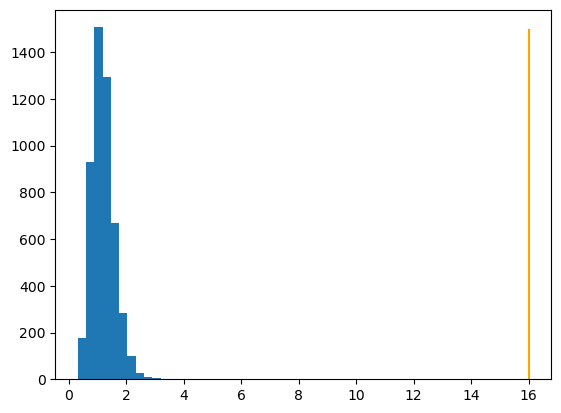

In [37]:
plt.hist(Z_arr)
plt.vlines(16,0,1500, colors='orange')

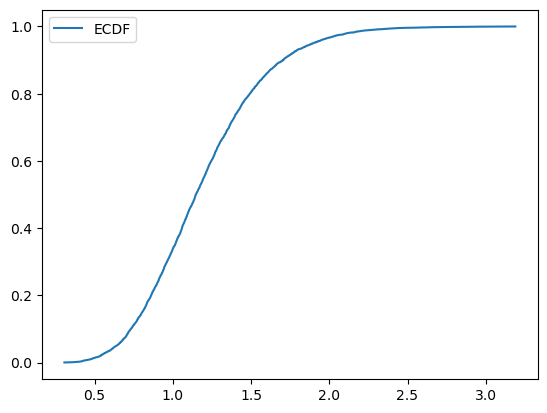

In [39]:
plt.plot(np.sort(Z_arr), np.arange(1,len(Z_arr)+1)/len(Z_arr), label = 'ECDF')
plt.legend()

3) A simple computation shows that $E[Z] = \frac{n}{(n-4)^2}\sigma_{Y}^2$. Is $Z$ biased or unbiased? Is $Z$ asymptotically
 unbiased? Motivate your answer. (2.5 points)

$Z$ is biased because $E[Z] = \frac{n}{(n-4)^2}\sigma_{Y}^2 \neq \sigma_{Y}^2$. And it's also asymptotically biased since $\lim_{n\rightarrow \infty} \frac{n}{(n-4)^2}\sigma_{Y}^2 = 0$ and not $\sigma_{Y}^2$. 

### German Tanks

In [5]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt

In [13]:
n = 10

outcomes = [N for N in range(1,1001)]
X = sample(outcomes, n) # sample does extraction with no repetition (differently from choices)
X

[895, 503, 346, 1000, 402, 424, 663, 378, 710, 514]

In [14]:
# Let's define the two estimators

T_1 = 2*np.mean(X) - 1
T_2 = (n+1)*max(X)/n - 1

print(T_1, T_2)

1166.0 1099.0


In [33]:
# Repeating the experiment 10000 times
n_exp = 10000


T1_arr = np.zeros(n_exp)
T2_arr = np.zeros(n_exp)
for j in range(n_exp):
    outcomes = [N for N in range(1,1001)]
    X = sample(outcomes, n) 
    T_1 = 2*np.mean(X) - 1
    T_2 = (n+1)*max(X)/n - 1
    T1_arr[j] = T_1
    T2_arr[j] = T_2

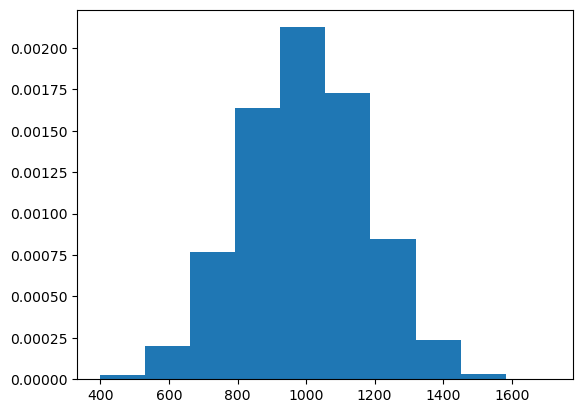

In [34]:
plt.hist(T1_arr, density= True, bins=10)
plt.show()

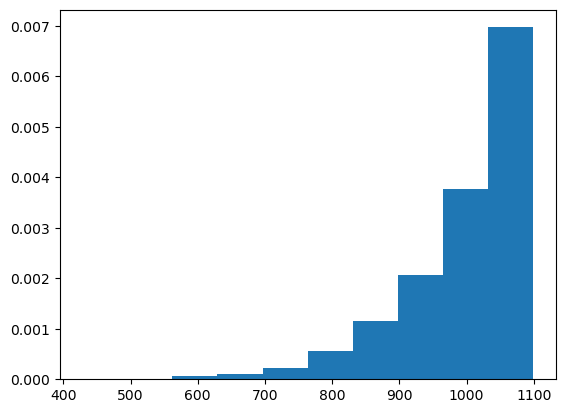

In [35]:
plt.hist(T2_arr, density = True)
plt.show()

In [36]:
# Actually both estimators are unbiased but this can't be proven numerically

bias_T1 = (np.mean(T1_arr) - 1000)
bias_T2 = (np.mean(T2_arr) - 1000)

print(bias_T1, bias_T2)

-3.448819999999955 -2.176900000000046


In [37]:
# From this test we can say that T2 is a better estimator

MSE_T1 = np.var(T1_arr) + bias_T1**2
MSE_T2 = np.var(T2_arr) + bias_T2**2

print(MSE_T1, MSE_T2)

32057.693260000004 8593.87738
